## Earthquake Early Warning Demo

This script is to show the estimation of the alert time for [earthquake early warning system](https://www.shakealert.org/). It is originally created by [Qingkai Kong](http://seismo.berkeley.edu/qingkaikong/) in 2014. Here I modifed to make things easier and cleaner. 

In [1]:
import warning_relationships
reload(warning_relationships)
from warning_relationships import *

%matplotlib inline

## Configuration

Change the location of the earthquake, origin time, alert sent out time and your location. Then you can run the two functions below to plot the warning time on a figure or on a map. Showing here is an example of 2014 M6.0 Napa earthquake in CA. I put the user location at Berkeley. 

In [2]:
evla = 38.2155   #earthquake latitude
evlo = -122.3117  #earthquake longitude
evdp = 11.25  # earthquake depth in km
mag = 6.0  #earthquake magitude

#event origin time
evt0 = UTCDateTime("2014-08-24T10:20:44.000")

#alert time from EEW (when the EEW system send out the alert)
alertT = UTCDateTime("2014-08-24T10:20:49.100")

#Your location
user_lat = 37.87
user_lon = -122.26

## Plot the warning time

This can show the p and s phase arrival time from 3 different models ((1) iasp91, (2) ak135, (3) common, and also the alert time. The common model is just simply assume the P wave velocity as 6.1 km/s and the S wave speed as 3.55 km/s. You can disable P travel time curve, S travel time curve or alert time line by setting them to False. you can choose plot without the city labels by setting the 'show_city' as False. If you choose to plot out the cities, then you need to specify a dictionary with city names as the key, and value is a tuple of latitude, longitude text relative to the s wave arrival in x direction, text relative to the s wave arrival in y direction. For Example:
```
'BSL':(37.87, -122.26, -30, 1.1)
'Name':(lat,   lon,     dx,  dy)
```
dx and dy controls where you plot the text of the cities and the corresponding arrow

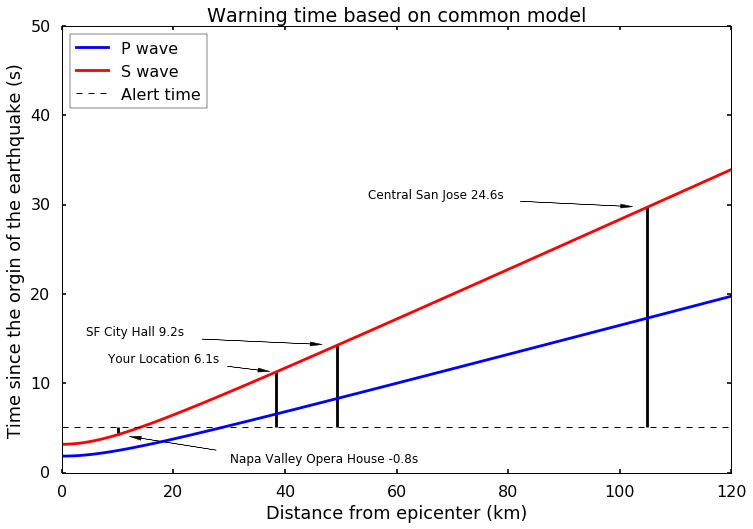

In [ ]:
cities = {
          'Napa Valley Opera House':(38.29950, -122.28568, 20, -3.1), 
          'Your Location':(user_lat, user_lon, -30, 1.1), 
          'SF City Hall':(37.7792, -122.4191, -45, 1.1),
          'Central San Jose':(37.3333, -121.9000, -50, 1.1),
          }
plot_P_and_S(evla, evlo, evdp, evt0, alertT, cities, max_dist = 120, max_T = 50, show_city=True
             , showP = True, showAlertT = True, model = 'common',show_title = True)

## Plot warning time on map

This can plot the warning time as circles on the map. We can also plot some cities as well by seeting show_cities to True. Besides, we can show the blind zone (places not getting alert) as a red circle. We can calculate the alert time based on 3 different models ((1) iasp91, (2) ak135, (3) common, and also the alert time. The common model is just simply assume the P wave velocity as 6.1 km/s and the S wave speed as 3.55 km/s.

Note: If you want to quickly plot the map, change show_counties = False, and resolution = 'l'

In [ ]:


cities = {
          'Napa Valley Opera House':(38.29950, -122.28568, 0.01, 0.03), 
          'BSL':(37.87, -122.26, 0.01, 0.03), 
          'SF City Hall':(37.7792, -122.4191, 0.01, -0.06),
          'Central San Jose':(37.3333, -121.9000, 0.01, 0.03),
          }

plot_warningTime_on_map(evla, evlo, evdp, evt0, alertT, map_range = 1.2, cities = cities, show_cities = True, 
                            figsize = (10,10), resolution = 'h', pretty = False, show_distance_label = True, 
                            show_counties = True, show_blind_zone = True, show_legend= True, model = 'common',
                            show_title = True)
